Genome similarity matrix calculation
---

In [1]:
import os
import matplotlib.pyplot as plt
from covid19.compute_helpers import similarity_matrix
from covid19.datasets import datasets_dir
from covid19.file_helpers import save_genomes, load_genomes, save_similarity_matrix, load_similarity_matrix

from covid19.net_helpers import download_genomes
from covid19.plot_helpers import plot_genomes_by_length

# JSON file containing the downloaded genome data
genomes_file = os.path.join(datasets_dir, 'genomes.json')

# Numpy compressed file that contains the genome similarity matrix
similarity_matrix_file = os.path.join(datasets_dir, 'similarity_matrix.npz')

ModuleNotFoundError: No module named 'covid19'

Download the latest genome data

In [2]:
genomes = download_genomes()
save_genomes(genomes, genomes_file)

Skipped 140/615 incomplete sequences


Or load the data from an existing file

In [3]:
genomes = load_genomes(genomes_file)

Plot the genome data by length

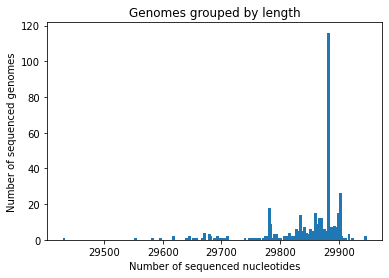

In [4]:
fig = plt.figure()
plot_genomes_by_length(genomes, fig)
plt.show()

Calculate the similarity matrix. This is done in parallel and could take a long time.

Given a list of genome sequences:

\begin{equation}
\bar{s} = [s_1, s_2, s_3, \dots, s_N]
\end{equation}

Its similarity matrix is defined as

\begin{equation}
S =
\begin{bmatrix}
1 & s_{12} & s_{13} & \dots & s_{1N} \\
s_{21} & 1 & s_{23} & \dots & s_{2N} \\
s_{31} & s_{32} & 1 & \dots & s_{3N} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
s_{N1} & s_{N2} & s_{N3} & \dots & 1
\end{bmatrix}
\end{equation}

with:

\begin{equation}
s_{ij} = s_{ji} = \frac{L(s_i, s_j)}{\max(|s_1|, |s_2|)} \text{ } \forall 1 \leq i, j \leq N
\end{equation}

where $L(s_i, s_j)$ is the [_Levenshtein distance_](https://en.wikipedia.org/wiki/Levenshtein_distance)
between $s_i$ and $s_j$.

In [5]:
matrix = similarity_matrix(genomes)

Save the similarity matrix to file

In [ ]:
save_similarity_matrix(matrix, similarity_matrix_file)

Load the matrix from file

In [ ]:
matrix = load_similarity_matrix(similarity_matrix_file)